# Op Amp circuits {#sec-Op_Amp_circuits}
<!--
## Abstract {.unnumbered}
Some typical Op Amp circuits are presented to explore the use of the Op Amp element type using sumbolic MNA. These examples represent some very common applications of Op Amps ranging from a buffer amplifier to a dual Op Amp active band pass filter. 
-->

## Introduction
Some typical Op Amp circuits are presented to explore the use of the Op Amp element type using symbolic MNA. These examples represent some very common applications of Op Amps ranging from a buffer amplifier to a dual Op Amp active band pass filter. The following Op Amp circuits are discussed below.

- Voltage follower
- Non-inverting amplifier
- Inverting amplifier
- Differential amplifier
- Integrator
- Differentiator
- Generalized Impedance Converter
- Generalized Impedance Converter Filter
- Dual amplifier band pass filter


also see @Stout1976, @Franco2002

In [2]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Voltage follower
![Op Amp voltage follower](Voltage-follower.png){#fig-voltage-follower width=300}  

The Op Amp configured as a voltage follower is shown above, in @fig-voltage-follower. The output of the output Op Amp is connected to the negative input of the Op Amp. This causes the output voltage to be equal to the input voltage and this arrangement is called a voltage follower because the out put voltage follows the input voltage. In this configuration, the Op Amp is used to as buffer amplifier or isolation amplifier since the amplifier provids a high input impedance and a low out put impedance. The gain of the amplifier is one. The circuit contains one component, the Op Amp. 

$\large{\color {red} {\text{describe circuit operation}}}$  

<!--
Due to the strong (i.e., unity gain) feedback and certain non-ideal characteristics of real operational amplifiers, this feedback system is prone to have poor stability margins. Consequently, the system may be unstable when connected to large capacitive loads. In these cases, a lag compensation network (e.g., connecting the load to the voltage follower through a resistor) can be used to restore stability. The manufacturer data sheet for the operational amplifier may provide guidance for the selection of components in external compensation networks. Alternatively, another operational amplifier can be chosen that has more appropriate internal compensation. 

The circuit in figure 12 demonstrates how the addition of a simple feedback loop to the open
loop amplifier converts it from a device of no usefulness to one with many practical applications.
Analyzing this circuit, we see that the voltage at the non-inverting input is EI, the voltage at the
inverting input approaches the voltage at the non-inverting input, and the output is at the same
voltage as the inverting input. Hence, EO = EI, and our analysis is complete. The simplicity of our
analysis is evidence of the power and utility of the summing point restraints we derived and have
at our disposal.

Our result also may be verified by mathematical analysis very simply. Since no current flows at
the non-inverting input, the input impedance of the voltage follower is infinite. The output
impedance is just that of the ideal operational amplifier itself, i.e. zero. Note also that no current
flows through the feedback loop, so any arbitrary (but finite) resistance may be placed in the
feedback loop without changing the properties of the ideal circuit, shown in figure 13. No voltage
would appear across the feedback element and the same mathematical analysis would hold

The feedback resistor is of particular importance if the op amp selected is a current-feedback
type. The stability of current-feedback op amps is dependent entirely on the value of feedback
resistor selected, and the designer should use the value recommended on the data sheet for the
device.

Unity gain circuits are used as electrical buffers to isolate circuits or devices from one another
and prevent undesired interaction. As a voltage following power amplifier, this circuit will allow a
source with low current capabilities to drive a heavy load.
The gain of the voltage follower with the feedback loop closed (closed loop gain) is unity. The
gain of the ideal operational amplifier without a feedback loop (open loop gain) is infinity. Thus,
we have traded gain for control by adding feedback. Such a severe sacrifice of gain - from
infinity to unity - is not necessary in most circuits. The rest of the ideal circuits to be studied will
give any (finite) closed loop gain desired while maintaining control through feedback
-->
The netlist for @fig-voltage-follower was obtained from LTSpice:

```
V1 1 0 1
XU1 2 1 2
```
The reference designaltor was changed from XU1 to O1.

In [3]:
net_list = '''
V1 1 0 1
O1 2 1 2 
'''

Generate the network equations.

In [4]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [5]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} = 0$<br>$I_{O1} = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{2} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [6]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [7]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$I_{V1} = 0$<br>$I_{O1} = 0$<br>$v_{1} = V_{1}$<br>$v_{2} = V_{1}$<br>

The voltage at node 2 is simply equal to the inout voltage.

In [8]:
U_sym[v2]

## Non-inverting amplifier
![non inverting amp](non-inverting-amp.png){#fig-non-inverting-amp width=300}  

@fig-non-inverting-amp shows the configuration of a non-inverting amplifier. Resistors Rf and R1 form a voltage divider circuit from the Op Amp out put terminal to the inverting input termial at node 4. Resistor Rp is some times included in Op Amp circuits as an impedance maching termination that matches the source impedance from the driving circuit, and in case, V1 and Rs.  

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- RS
- Rp
- R1
- Rf
- V1
- U1


The circuit was entered into LTSpice and the netlist was generated.

```
V1 1 0 1
XU1 4 3 2 opamp Aol=100K GBW=10Meg
Rs 3 1 100
R1 0 5 2k
Rf 2 5 2k
Rp 4 5 100
```
As shown below, some edits were made to the netlist.

In [9]:
net_list = '''
V1 1 0 1
O1 4 3 2 
Rs 3 1 100
R1 0 5 2e3
Rf 2 5 2e3
Rp 4 5 100
'''

Generate the network equations.

In [10]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [11]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{Rs} - \frac{v_{3}}{Rs} = 0$<br>$I_{O1} + \frac{v_{2}}{Rf} - \frac{v_{5}}{Rf} = 0$<br>$- \frac{v_{1}}{Rs} + \frac{v_{3}}{Rs} = 0$<br>$\frac{v_{4}}{Rp} - \frac{v_{5}}{Rp} = 0$<br>$v_{5} \cdot \left(\frac{1}{Rp} + \frac{1}{Rf} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{Rp} - \frac{v_{2}}{Rf} = 0$<br>$v_{1} = V_{1}$<br>$- v_{3} + v_{4} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [12]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [13]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{R_{1} V_{1} + Rf V_{1}}{R_{1}}$<br>$v_{3} = V_{1}$<br>$v_{4} = V_{1}$<br>$v_{5} = V_{1}$<br>$I_{V1} = 0$<br>$I_{O1} = - \frac{V_{1}}{R_{1}}$<br>

Solving for the transfer function at node 2.

In [14]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

Usually written in text books as:

In [15]:
H_sym.expand()

## Inverting amplifier
![inverting amp](inverting-amp.png){#fig-inverting-amp width=300}  

@fig-inverting-amp shows the typical connection for an inverting amplifier. This configuratin is called an inverting amplifier since the output signal is inverted with respect to the inout signal. Resistors Rf and R1 set the gain of the amplifier. Resistor Rp is sometime used to balance the impedance as seen from the Op Amps two inputs. Usually the value of Rp is chosen to be equal to the paralled combination of R1 and Rf.

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- Rp
- R1
- Rf
- V1
- U1


The schematic for the circuit was entered into LTSpice and the following netlist was generated.
```
V1 1 0 1
XU1 3 4 2 opamp Aol=100K GBW=10Meg
R1 3 1 2k
Rp 0 4 1k
Rf 3 2 2k
```
A few edits were made to the netlist.

In [16]:
net_list = '''
V1 1 0 1
O1 3 4 2 
R1 3 1 2e3
Rp 0 4 1e3
Rf 3 2 2e3
'''

Generate the network equations.

In [17]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [18]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$I_{O1} + \frac{v_{2}}{Rf} - \frac{v_{3}}{Rf} = 0$<br>$v_{3} \cdot \left(\frac{1}{Rf} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{Rf} - \frac{v_{1}}{R_{1}} = 0$<br>$\frac{v_{4}}{Rp} = 0$<br>$v_{1} = V_{1}$<br>$v_{3} - v_{4} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [19]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [20]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = - \frac{Rf V_{1}}{R_{1}}$<br>$v_{3} = 0$<br>$v_{4} = 0$<br>$I_{V1} = - \frac{V_{1}}{R_{1}}$<br>$I_{O1} = \frac{V_{1}}{R_{1}}$<br>

Solving for the transfer function at node 2.

In [21]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

## Differential amplifier
![differential amp](differential-amp.png){#fig-differential-amp width=400}  

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- R1
- R2
- R3
- R4
- V1
- U1

include comments about summing amp configuration


```
XU1 4 5 2 opamp Aol=100K GBW=10Meg
V1 1 6 1
R1 4 1 1k
R3 2 4 1k
R4 0 5 1k
R2 5 3 1k
V2 3 6 3
V3 6 0 10
```


In [22]:
net_list = '''
O1 4 5 2
V1 1 6 1
R1 4 1 1e3
R3 2 4 1e3
R4 0 5 1e3
R2 5 3 1e3
V2 3 6 3
V3 6 0 100
'''

Generate the network equations.

In [23]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [24]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{4}}{R_{1}} = 0$<br>$I_{O1} + \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{3}} = 0$<br>$I_{V2} + \frac{v_{3}}{R_{2}} - \frac{v_{5}}{R_{2}} = 0$<br>$v_{4} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{1}}{R_{1}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}} = 0$<br>$- I_{V1} - I_{V2} + I_{V3} = 0$<br>$v_{1} - v_{6} = V_{1}$<br>$v_{3} - v_{6} = V_{2}$<br>$v_{6} = V_{3}$<br>$v_{4} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [25]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [26]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1} + V_{3}$<br>$v_{2} = \frac{R_{1} R_{4} V_{2} + R_{1} R_{4} V_{3} - R_{2} R_{3} V_{1} - R_{2} R_{3} V_{3} - R_{3} R_{4} V_{1} + R_{3} R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>$v_{3} = V_{2} + V_{3}$<br>$v_{4} = \frac{R_{4} V_{2} + R_{4} V_{3}}{R_{2} + R_{4}}$<br>$v_{5} = \frac{R_{4} V_{2} + R_{4} V_{3}}{R_{2} + R_{4}}$<br>$v_{6} = V_{3}$<br>$I_{V1} = \frac{- R_{2} V_{1} - R_{2} V_{3} - R_{4} V_{1} + R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>$I_{V2} = \frac{- V_{2} - V_{3}}{R_{2} + R_{4}}$<br>$I_{V3} = \frac{- R_{1} V_{2} - R_{1} V_{3} - R_{2} V_{1} - R_{2} V_{3} - R_{4} V_{1} + R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>$I_{O1} = \frac{R_{2} V_{1} + R_{2} V_{3} + R_{4} V_{1} - R_{4} V_{2}}{R_{1} R_{2} + R_{1} R_{4}}$<br>

In [27]:
U_sym[v2]

In [28]:
U_sym[v2].subs({R1:1e3,R2:1e3,R3:1e3,R4:1e3})

## Summing amplifier

https://the-analog-thing.org/docs/dirhtml/rst/computing_elements/THAT_elements/summer/



## Integrator
![integrator](integrator.png){#fig-integrator width=400}  

The circuit above is an example of an Op Amp integrator. An produces an output voltage which is proportional to the integral of the input voltage, that is, the output is proportional to the product of the amplitude and duration of the input. The configuration is essenctally a low pass filter. The circuit is from @Stout1976 (Op Amp Handbook, by Stout, Fig 15.1), chapter 15. 

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- R1
- R2
- Rp
- Rf
- Cf
- Cp
- V1
- U1


https://the-analog-thing.org/docs/dirhtml/rst/computing_elements/THAT_elements/integrator/


<!--
15.2 INTEGRATOR

INTRODUCTION
An integrator is a low-pass filter, and a differentiator is a high-pass filter. Each of these two circuits therefore performs a mathematical function which is the inverse of the other. Even though these circuits are related mathematically, the practical problems associated with each are completely different. The prime differentiator problems are noise and instability. The integrator is prone to de drift and offset.

ALTERNATE NAMES Integrating amplifier, integral amplifier, definite- integral circuit, analog integrator, low-pass filter.

EXPLANATION OF OPERATION 

An ideal integrator produces an output voltage which is proportional to the integral of the input voltage. In other words, the output is proportional to the product of the amplitude and duration of the input. The integrator performs this mathematical operation on an instantaneous basis, producing an output proportional to the sum of the products of instantaneous voltages and vanishingly small increments of time. The result is an output exactly proportional to the area under a waveform.

The circuit shown in Fig. 15.3 performs integration by using an op amp to force the same current through both R1 and Cf. The voltage across the feed- back capacitor is related to capacitor current by

1
Cf
fi,dt

Since the circuit causes i, to equal the input current (i; = v2/R1),

Vc = vo
1
RC, fodt
Ꭱ

The gain of the circuit is given by -1/R1Cf. Thus the output voltage will change by -1/R1Cf V/s for each volt of input. Numerically, the circuit performs integration in the following manner. For a start, assume v1 = v = 0, R1 = 10 k ohms, and Cf = 1 μF. Under these conditions no current will flow through R1 or Cf. If a -1 V dc level is suddenly applied to v1, a current of v1/R1 = -1/10^4 = -100 μA will immediately flow in R1. If we assume the op amp draws no current, 100 μA must also immediately flow through Cf. To obtain a dc current of 100 μA through Cf, we require a linear positive ramp at v. The current through the capacitor must satisfy i, C,(dv,/dt). The ramp at v, will therefore have a slope of

dv。
is _ —Vi.
dt
C
RC,
-(-1) 104 × 10-6
100 V/s

This is equivalent to saying

1
R1Cf
Jo,dt = 100t

Since the input waveform can be sinusoidal or nonlinear, we have used the lowercase generalized nomenclature. The uppercase nomenclature is only for sinusoidal ac operations or dc parameters.
io

The op amp input offset voltage Vio and input offset current Io add errors to the above equations. If R, is not included in the circuit, the error caused by L is replaced by a larger error due to input bias current I. The output voltage with these errors included is
1
+
+
RC (v,dt ± [V1dt) = [1,dt ± Vio
R,C,
C

Note that Vio causes a small step voltage ±Vio and a ± ramp with a gain of 1/R,C,. However, I causes a ramp with a gain of 1/C,. This latter error source may be reduced if the designer has the option available to increase C, and lower R1. If this is done, one must realize that the input resistance is lowered and the leakage component of C, will probably be increased. The leakage current through Cf must be less than Ib.
-->

The schematic for the integrator was entered into LTSpice and the netlist was was obtained.
```
* C:\users\jeff64\My Documents\Modeling Op Amps\integrator.asc
V1 1 0 AC 1
XU1 4 5 2 opamp Aol=100K GBW=10Meg
R1 3 1 1.129k
R2 4 3 1k
Rp 0 5 1k
Rf 3 2 20k
Cf 2 3 0.005µ
Cp 5 0 0.05µ
.lib opamp.sub
.ac dec 100 1 100e3
* Integrator
.backanno
.end
```
A few edits were made and the netlist is assigned to the net_list variable.

In [61]:
net_list = '''
V1 1 0 1
O1 4 5 2 
R1 3 1 1.129e3
R2 4 3 1e3
Rp 0 5 1e3
Rf 3 2 20e3
Cf 2 3 0.005e-6
Cp 5 0 0.05e-6
'''

Generate the network equations.

In [62]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [63]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \left(Cf s + \frac{1}{Rf}\right) + v_{3} \left(- Cf s - \frac{1}{Rf}\right) = 0$<br>$v_{2} \left(- Cf s - \frac{1}{Rf}\right) + v_{3} \left(Cf s + \frac{1}{Rf} + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- \frac{v_{3}}{R_{2}} + \frac{v_{4}}{R_{2}} = 0$<br>$v_{5} \left(Cp s + \frac{1}{Rp}\right) = 0$<br>$v_{1} = V_{1}$<br>$v_{4} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [64]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [65]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = - \frac{Rf V_{1}}{Cf R_{1} Rf s + R_{1}}$<br>$v_{3} = 0$<br>$v_{4} = 0$<br>$v_{5} = 0$<br>$I_{V1} = - \frac{V_{1}}{R_{1}}$<br>$I_{O1} = \frac{V_{1}}{R_{1}}$<br>

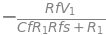

In [66]:
U_sym[v2]

In [67]:
t = symbols('t',positive=True)  # t > 0

In [68]:
inverse_laplace_transform(U_sym[v2], s, t)

### Transfer function
Solving for the transfer function at node 2. Transfer functions are normally presented in the frequency domain and are steady state responses.

In [69]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

In [70]:
element_values = SymMNA.get_part_values(network_df)
element_values

{Cf: 5e-09, Cp: 5e-08, O₁: nan, R₁: 1129.0, R₂: 1000.0, Rf: 20000.0, Rp: 1000.
0, V₁: 1.0}

In [71]:
element_values[V1] = laplace_transform(1*Heaviside(t), t, s)[0] # step function as a test
#element_values[V1] = laplace_transform(400*exp(-0.1*t)*sin(4*t), t, s)[0] # driving function in example
NE = NE_sym.subs(element_values)
NE

                                                                              
⎡                     I_V1 + 0.000885739592559787⋅v₁ - 0.000885739592559787⋅v₃
⎢                                                                             
⎢                      I_O1 + v₂⋅(5.0e-9⋅s + 5.0e-5) + v₃⋅(-5.0e-9⋅s - 5.0e-5)
⎢                                                                             
⎢-0.000885739592559787⋅v₁ + v₂⋅(-5.0e-9⋅s - 5.0e-5) + v₃⋅(5.0e-9⋅s + 0.0019357
⎢                                                                             
⎢                                       -0.001⋅v₃ + 0.001⋅v₄                  
⎢                                                                             
⎢                                       v₅⋅(5.0e-8⋅s + 0.001)                 
⎢                                                                             
⎢                                                v₁                           
⎢                                                   

In [72]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{1}{s}$<br>$v_{2} = - \frac{885739592559787.0}{5000000000.0 s^{2} + 50000000000000.0 s}$<br>$v_{3} = 0.0$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$I_{V1} = - \frac{0.000885739592559787}{s}$<br>$I_{O1} = \frac{0.000885739592559787}{s}$<br>

In [73]:
inverse_laplace_transform(U[v2], s, t)

## Differentiator
![differentiator](differentiator.png){#fig-differentiator width=400}  

@fig-differentiator implements a circuit which produces an output proporational to the derivative of the input voltage. The circuit is from (Op Amp Handbook, by Stout, Fig 15.1), chapter 15. C1 and Rf togather with the Op Amp implement the differentiator function. R1 and Cf stabalized the feedback loop. Rp prevents Ib from producing a dc offset at the op amp output. Capacitor Cp is required to bypass the thermal noise of Rp to ground and to maintain loop stability. A more compresive description of the circuit can be found in the referenced hadbook.

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- R1
- C1
- R2
- Rp
- Rf
- Cf
- Cp
- V1
- U1

<!--
The basic circuit which will perform this function requires the op amp, C1, and Rf in Fig. 15.1. The other parts (R1, Cf, Rp and Cp) have been added for reasons to be explained below. R1 and Cf, if properly sized, will stabilize the feedback loop, which is inherently unstable in the basic differentiator circuit. Referring to Fig. 15.2, if R1 is not present, the open- and closed-loop frequency responses of the circuit inter- sect at 40 dB/decade (12 dB/octave). As shown in Chap. 3, the intersection should be 20 dB/decade (6 dB/octave) or less to provide absolute stability. 

Most op amps have another open-loop pole near fu which leads to more instability. Cf does not allow the closed-loop gain curve to intersect the open-loop curve until the unity-gain crossover frequency has been exceeded. This provides an additional measure of stability.

Rp prevents Ib from producing a dc offset at the op amp output. Rp can be made adjustable from <Rf to >Rf to cancel out the effects of both Ib and Iio 

Capacitor Cp is required to bypass the thermal noise of Rp to ground and to maintain loop stability. It is added only if R, is greater than 5 or 10 k ohms. Cp is chosen so that its reactance is less than one-tenth Rp for all frequencies down to fd, if possible. See Chap. 3 for a discussion of the feedback-stability aspects of Cp and Rp.

INTRODUCTION
An integrator is a low-pass filter, and a differentiator is a high-pass filter. Each of these two circuits therefore performs a mathematical function which is the inverse of the other. Even though these circuits are related mathematically, the practical problems associated with each are completely different. The prime differentiator problems are noise and instability. The integrator is prone to de drift and offset.

15.1 DIFFERENTIATOR

ALTERNATE NAMES First-derivative circuit, differentiating amplifier, high- pass filter.

EXPLANATION OF OPERATION 
An ideal differentiator produces an instantane- ous output voltage which is precisely proportional to the instantaneous derivative of the input voltage. The basic circuit which will perform this function requires the op amp, C1, and Rf in Fig. 15.1. The other parts (R1, Cf, Rp and Cp) have been added for reasons to be explained below. R1 and Cf, if properly sized, will stabilize the feedback loop, which is inherently unstable in the basic differentiator circuit. Referring to Fig. 15.2, if R1 is not present, the open- and closed-loop frequency responses of the circuit inter- sect at 40 dB/decade (12 dB/octave). As shown in Chap. 3, the intersection should be 20 dB/decade (6 dB/octave) or less to provide absolute stability. 

Most op amps have another open-loop pole near fu which leads to more instability. Cf does not allow the closed-loop gain curve to intersect the open-loop curve until the unity-gain crossover frequency has been exceeded. This provides an additional measure of stability.

Rp prevents Ib from producing a dc offset at the op amp output. Rp can be made adjustable from <Rf to >Rf to cancel out the effects of both Ib and Iio 

Capacitor Cp is required to bypass the thermal noise of Rp to ground and to maintain loop stability. It is added only if R, is greater than 5 or 10 k ohms. Cp is chosen so that its reactance is less than one-tenth Rp for all frequencies down to fd, if possible. See Chap. 3 for a discussion of the feedback-stability aspects of Cp and Rp.

Since this circuit is sensitive to the slope of the input signal, the designer must be aware of the relation between maximum input slope and maximum output voltage:

$v_o(max) = R_fC_1 \frac {\mathrm d v_i}{\mathrm d t} (max)$

If the possibility exists that input slopes steeper than the above maximum slope may be present, the zener-diode clamp is recommended. These zeners will prevent C1 from acquiring a charge when unipolar noise bursts occur. This avoids a temporary paralysis of the input which could possibly last for a period of time after the burst.

True differentiation will occur for frequencies below fcp1. Beyond this frequency the circuit behaves as a voltage amplifier with progressively lower gain at higher frequencies.
    
DESIGN EXAMPLE As a practical example suppose we need to generate a rectangular waveform from a sawtooth waveform. The maximum input slope is given to be ±0.1 V/us. The resulting maximum output voltage should be +10 V.
    
```
Device Data (108 op amp)
Vio = 2 mV max at +25°C
Iio = 0.2 nA max at +25°C 
Vn = 50 nV/Hz1/2
In (not specified for 108)
fop1 = 20 Hz (minimum compensation) 
fop2 = 2 MHz (minimum compensation) 
fu= 3 MHz (minimum compensation) 
Rid = 3 × 10^7 ohms
```
Also see LTSpice circuits folder for OCR of pages

-->

The schamitic for the circuit was entered into LTSpice and the netlist was exported.

```
XU1 5 4 2 opamp Aol=100K GBW=10Meg
V1 1 0 AC 1
R1 3 1 1.129k
Rf 2 5 20k
Rp 0 4 20k
C1 5 3 0.005µ
Cf 2 5 70p
Cp 0 4 0.05µ
```
The netlist was editited as shown below.

In [74]:
net_list = '''
O1 5 4 2 
V1 1 0 1
R1 3 1 1.129e3
Rf 2 5 20e3
Rp 0 4 20e3
C1 5 3 0.005e-6
Cf 2 5 70e-12
Cp 0 4 0.05e-6
'''

Generate the network equations.

In [75]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [76]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \left(Cf s + \frac{1}{Rf}\right) + v_{5} \left(- Cf s - \frac{1}{Rf}\right) = 0$<br>$- C_{1} s v_{5} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}} = 0$<br>$v_{4} \left(Cp s + \frac{1}{Rp}\right) = 0$<br>$- C_{1} s v_{3} + v_{2} \left(- Cf s - \frac{1}{Rf}\right) + v_{5} \left(C_{1} s + Cf s + \frac{1}{Rf}\right) = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [77]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations.

In [78]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = - \frac{C_{1} Rf V_{1} s}{C_{1} Cf R_{1} Rf s^{2} + C_{1} R_{1} s + Cf Rf s + 1}$<br>$v_{3} = \frac{V_{1}}{C_{1} R_{1} s + 1}$<br>$v_{4} = 0$<br>$v_{5} = 0$<br>$I_{V1} = - \frac{C_{1} V_{1} s}{C_{1} R_{1} s + 1}$<br>$I_{O1} = \frac{C_{1} V_{1} s}{C_{1} R_{1} s + 1}$<br>

Solving for the transfer function at node 2.

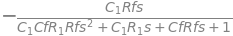

In [79]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.simplify()

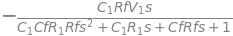

In [80]:
U_sym[v2]

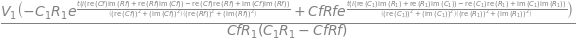

In [81]:
inverse_laplace_transform(U_sym[v2], s, t)

In [82]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 5e-09, Cf: 7e-11, Cp: 5e-08, O₁: nan, R₁: 1129.0, Rf: 20000.0, Rp: 20000.
0, V₁: 1.0}

In [83]:
element_values[V1] = laplace_transform(1*Heaviside(t), t, s)[0] # step function as a test
#element_values[V1] = laplace_transform(400*exp(-0.1*t)*sin(4*t), t, s)[0] # driving function in example
NE = NE_sym.subs(element_values)
NE

                                                                              
⎡          I_V1 + 0.000885739592559787⋅v₁ - 0.000885739592559787⋅v₃           
⎢                                                                             
⎢          I_O1 + v₂⋅(7.0e-11⋅s + 5.0e-5) + v₅⋅(-7.0e-11⋅s - 5.0e-5)          
⎢                                                                             
⎢-5.0e-9⋅s⋅v₅ - 0.000885739592559787⋅v₁ + v₃⋅(5.0e-9⋅s + 0.000885739592559787)
⎢                                                                             
⎢                           v₄⋅(5.0e-8⋅s + 5.0e-5)                            
⎢                                                                             
⎢      -5.0e-9⋅s⋅v₃ + v₂⋅(-7.0e-11⋅s - 5.0e-5) + v₅⋅(5.07e-9⋅s + 5.0e-5)      
⎢                                                                             
⎢                                     v₁                                      
⎢                                                   

In [84]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{1}{s}$<br>$v_{2} = - \frac{4.42869796279894 \cdot 10^{17}}{35000000000.0 s^{2} + 3.12001771479185 \cdot 10^{16} s + 4.42869796279894 \cdot 10^{21}}$<br>$v_{3} = \frac{885739592559787.0}{5000000000.0 s^{2} + 885739592559787.0 s}$<br>$v_{4} = 0.0$<br>$v_{5} = 0.0$<br>$I_{V1} = - \frac{885739592559787.0}{1.0 \cdot 10^{18} s + 1.77147918511957 \cdot 10^{23}}$<br>$I_{O1} = \frac{885739592559787.0}{1.0 \cdot 10^{18} s + 1.77147918511957 \cdot 10^{23}}$<br>

In [85]:
inverse_laplace_transform(U[v2], s, t)

## Generalized Impedance Converter (GIC) circuit
![GIC circuit](GIC-circuit.png){#fig-GIC-circuit width=400}  

See @Williams1995

The circuit of figure 3-31 is known as a generalized impedance converter (GIC), The driving-point impedance can be expressed as
 
By substituting RC combinations of up to two capacitors for Z1 through Zs, a variety of impedances can be simulated. If, for instance, Z4 consists of a capacitor having an impedance 1/sC, where s = jo and all other elements are resistors, the driving-point impedance is given by

The impedance is proportional to frequency and is therefore identical to an
inductor having a value of

See @Bruton1978

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- R1 through R5
- V1
- U1, U2


[Gee, I see! The Ins and Outs of Generalized Impedance Converters](https://www.planetanalog.com/gee-i-see-the-ins-and-outs-of-generalized-impedance-converters/)

[Lowpass Filters That Don’t: A Tale of Leakage Current](https://www.planetanalog.com/lowpass-filters-that-dont-a-tale-of-leakage-current/)

[Filter DC Voltages Outside Your Supply Rails](https://www.planetanalog.com/filter-dc-voltages-outside-your-supply-rails/)


Negative impedance converter
https://en.wikipedia.org/wiki/Negative_impedance_converter

```
If two capacitors are introduced for Z, and Z3 and Z2, Z4, and Zs are resistors, the resulting driving-point impedance expression can be expressed in the form of
Rs
Z11=
s2C2R2R4
(3-62)
An impedance proportional to 1/s2 is called a D element, whose driving-point impedance is given by
Z11=
17123
Equation (3-62) therefore defines a D element having the value
D=
C2R2R4 Rs
(3-63)
(3-64)
If we let C = 1 F, R2 = Rs = 122, and R4 = R, equation (3-64) simplifies to D = R. In order to gain some insight into the nature of this element, let us substitute s=jo into equation (3-62). The resulting expression is
Z11=
R5 w2C2R2R4
(3-65)
Equation (3-65) corresponds to a frequency-dependent negative resistor (FDNR).
A GIC in the form of a normalized D element and its schematic designation are shown in figure 3-33. Bruton (see bibliography) has shown how the FDNR or D ele- ment can be used to generate active filters directly from the LC normalized low-pass prototype values. This technique will now be described.

The 1/s Transformation. If all the impedances of an LC filter network are multi- plied by 1/s, the transfer function remains unchanged. This operation is equivalent to

```

```
* C:\users\jeff64\My Documents\Modeling Op Amps\GIC circuit.asc
XU2 3 1 4 opamp Aol=100K GBW=10Meg
V1 1 0 1
XU1 3 5 2 opamp Aol=100K GBW=10Meg
R2 2 3 1
R4 4 5 1
R5 5 0 1
R1 1 2 1
R3 3 4 1
.lib opamp.sub
* GIC Fig 3-31
;ac dec 100 0.01 10
.op
.backanno
.end
```

### Basic GIC

In [41]:
# basic
net_list = '''
O2 3 1 4 
V1 1 0 1
O1 3 5 2
R1 1 2 1
R2 2 3 1
R3 3 4 1
R4 4 5 1
R5 5 0 1
'''

In [42]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

In [43]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{2}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$v_{3} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{3}} - \frac{v_{2}}{R_{2}} = 0$<br>$I_{O2} + v_{4} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{4}} - \frac{v_{3}}{R_{3}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{4}}{R_{4}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{3} = 0$<br>$v_{3} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [44]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [45]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{- R_{2} R_{4} V_{1} + R_{3} R_{5} V_{1}}{R_{3} R_{5}}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{R_{4} V_{1} + R_{5} V_{1}}{R_{5}}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{R_{2} R_{4} V_{1}}{R_{1} R_{3} R_{5}}$<br>$I_{O2} = \frac{- R_{3} V_{1} - R_{4} V_{1}}{R_{3} R_{5}}$<br>$I_{O1} = \frac{R_{1} R_{4} V_{1} + R_{2} R_{4} V_{1}}{R_{1} R_{3} R_{5}}$<br>

Solving for the impedance at node 1.

In [46]:
Z_sym = U_sym[v1]/(-U_sym[I_V1])
Z_sym #.simplify()

### Inductor

In [47]:
# inductor
net_list = '''
O2 3 1 4 
V1 1 0 1
O1 3 5 2
R1 1 2 1
R2 2 3 1
R3 3 4 1
*R4 4 5 1
C 4 5 1
R5 5 0 1
'''

In [48]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

In [49]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{2}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$v_{3} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{3}} - \frac{v_{2}}{R_{2}} = 0$<br>$- C s v_{5} + I_{O2} + v_{4} \left(C s + \frac{1}{R_{3}}\right) - \frac{v_{3}}{R_{3}} = 0$<br>$- C s v_{4} + v_{5} \left(C s + \frac{1}{R_{5}}\right) = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{3} = 0$<br>$v_{3} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [50]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [51]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C R_{3} R_{5} V_{1} s - R_{2} V_{1}}{C R_{3} R_{5} s}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{C R_{5} V_{1} s + V_{1}}{C R_{5} s}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{R_{2} V_{1}}{C R_{1} R_{3} R_{5} s}$<br>$I_{O2} = \frac{- C R_{3} V_{1} s - V_{1}}{C R_{3} R_{5} s}$<br>$I_{O1} = \frac{R_{1} V_{1} + R_{2} V_{1}}{C R_{1} R_{3} R_{5} s}$<br>

Solving for the impedance at node 1.

In [52]:
Z_sym = U_sym[v1]/(-U_sym[I_V1])
Z_sym #.simplify()

### D element - frequency dependent negative resistor

[Frequency-dependent negative resistor](https://en.wikipedia.org/wiki/Frequency-dependent_negative_resistor)

In [53]:
# D element - frequency dependent negative resistor
net_list = '''
O2 3 1 4 
V1 1 0 1
O1 3 5 2
*R1 1 2 1
C1 1 2 1
R2 2 3 1
*R3 3 4 1
C3 3 4 1
R4 4 5 1
R5 5 0 1
'''

In [54]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

In [55]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{2} + I_{V1} = 0$<br>$- C_{1} s v_{1} + I_{O1} + v_{2} \left(C_{1} s + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}} = 0$<br>$- C_{3} s v_{4} + v_{3} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{2}} = 0$<br>$- C_{3} s v_{3} + I_{O2} + v_{4} \left(C_{3} s + \frac{1}{R_{4}}\right) - \frac{v_{5}}{R_{4}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{4}}{R_{4}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{1} + v_{3} = 0$<br>$v_{3} - v_{5} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [56]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the equations and display the results.

In [57]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{- C_{3} R_{2} R_{4} V_{1} s + R_{5} V_{1}}{R_{5}}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{R_{4} V_{1} + R_{5} V_{1}}{R_{5}}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{C_{1} C_{3} R_{2} R_{4} V_{1} s^{2}}{R_{5}}$<br>$I_{O2} = \frac{- C_{3} R_{4} V_{1} s - V_{1}}{R_{5}}$<br>$I_{O1} = \frac{C_{1} C_{3} R_{2} R_{4} V_{1} s^{2} + C_{3} R_{4} V_{1} s}{R_{5}}$<br>

Solving for the impedance at node 1.

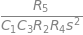

In [58]:
Z_sym = U_sym[v1]/(-U_sym[I_V1])
Z_sym #.simplify()

## Generalized Impedance Converter Filter
![GIC-LP-filter](GIC-LP-filter.png){#fig-GIC-LP-filter width=500}  

The design method proceeds by first selecting a normalized low-pass LC filter. All capacitors must be restricted to the shunt arms only, since they will be trans- formed into D elements which are connected to ground. The dual LC filter defined by the lower schematic in the tables of chapter 11 is usually chosen to be trans- formed. The circuit elements are modified by the 1/s transformation, and the D elements are realized using the normalized GIC circuit of figure 3-33. The transformed filter is then frequency- and impedance-scaled in the conventional manner. The fol- lowing example demonstrates the design of an all-pole active low-pass filter using the 1/s impedance transformation and the GIC.

If all the impedances (including the source and load impedances) of a passive ladder filter are divided by sk, the transfer function is not changed. The effect of this division is to transform resistors into capacitors, inductors into resistors and capacitors into FDNRs. The purpose of this transformation is to eliminate inductors which are often problematic components. This technique is especially useful when all the capacitors are grounded. If the technique is applied to capacitors that are not grounded, the resulting FDNRs are floating (neither end is grounded), which in practice, can be difficult to stabilize. 

The resulting circuit has two problems. Practical FDNRs require a DC path to ground. The DC transfer function has a value of (R6)/(R1 + R6). The transformed ladder filter realizes the DC transfer gain as the ratio of two capacitors. In the ideal case, this is valid, but in the practical case there is always some, usually unpredictable, finite resistance across the capacitors so that the DC performance of the transformed ladder is unpredictable. Ra and Rb are added to the circuit to mitigate these problems. If Rb/(Ra + Rb + L3/k + L5/k) = (R6)/(R1 + R6) then the DC gain of the transformed circuit is the same as the predecessor circuit. Finally, if Ra and Rb are large with respect to the other resistors there is little effect on the filter's transition band and high frequency behavior.[3]: 292 


$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- R1 through R5
- V1
- U1, U2

```
EXAMPLE 3-16
REQUIRED:
Active low-pass filter 3 dB to 400 Hz
20 dB minimum at 1200 Hz Minimal ringing and overshoot
RESULT:
(a) Compute the steepness factor.

(b) Since low transient distortion is desired, a linear phase filter with a phase error of 0.5° will be selected. The curves of figure 2-62 indicate that a filter complexity of n = 3 provides over 20 dB of attenuation at 3 rad/s.
The 1/s transformation and a GIC realization will be used.
(c) The normalized LC low-pass filter from table 11-47 corresponding to n = 3 is shown in figure 3-34a. The dual circuit has been selected so that only a single D element will be required.
(d) The normalized filter is transformed in accordance with table 3-1, resulting in the cir- cuit of figure 3-34b. The D element is realized using the normalized GIC configura- tion of figure 3-33, as shown in figure 3-34c.
(e) Since all normalized capacitors are 1 F, it would be desirable if they were all denor- malized to a standard value such as 0.01 μF. Using an FSF of 2rf, or 2513 and a C'of 0.01 uF, the required impedance-scaling factor can be found by solving equation (2-10) for Z as follows:
Z=
C
1
FSFX C' 2513 x 0.01 x 10-6
```

```
* C:\users\jeff64\My Documents\Modeling Op Amps\GIC-LP-Filter.asc
XU2 6 4 7 opamp Aol=100K GBW=10Meg
V1 1 0 AC 1
XU1 6 8 5 opamp Aol=100K GBW=10Meg
C1 3 1 1
C2 5 4 1
C3 7 6 1
C4 0 2 1
R2 5 6 1
R3 7 8 1.0218
R4 8 0 1
R1 4 3 0.5534
R5 2 4 2.425
Rb 2 0 10Meg
Ra 3 1 10Meg
.lib opamp.sub
* Filter Handbook Fig. 3-34c
.ac dec 100 0.01 10
.backanno
.end
```

The netlist for @fig-GIC-LP-filter is pasted into the cell below.

Ra and Rb are commented out. Why?

In [59]:
net_list = '''
O2 6 4 7 
V1 1 0 1
O1 6 8 5 
C1 3 1 1
C2 5 4 1
C3 7 6 1
C4 0 2 1
R2 5 6 1
R3 7 8 1.0218
R4 8 0 1
R1 4 3 0.5534
R5 2 4 2.425
*Rb 2 0 10e6
*Ra 3 1 10e6
'''

Generate the network equations.

Generate markdown text to display the network equations.

In [60]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{1} s v_{1} - C_{1} s v_{3} + I_{V1} = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{R_{5}}\right) - \frac{v_{4}}{R_{5}} = 0$<br>$- C_{1} s v_{1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{5}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{5}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O1} + v_{5} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{2}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$- C_{3} s v_{6} + I_{O2} + v_{7} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{8}}{R_{3}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{3}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{6} = 0$<br>$v_{6} - v_{8} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [61]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

### Symbolic transfer function
Solving for the transfer function at node 2.

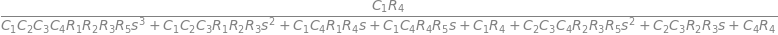

In [62]:
U_sym = solve(NE_sym,X)

H_sym = U_sym[v2]/U_sym[v1]
H_sym

In [63]:
num, den = fraction(H_sym)

In [64]:
num

In [65]:
den

In [66]:
p = solve(den,s)

In [67]:
len(p)

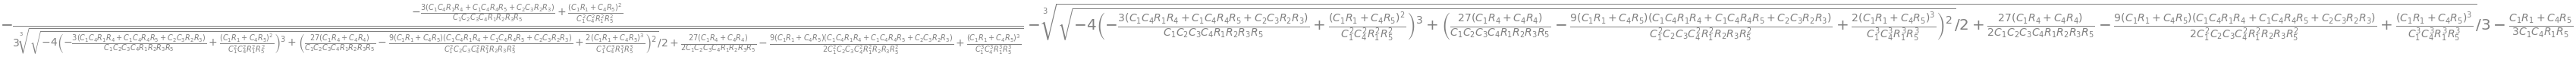

In [68]:
p[0]

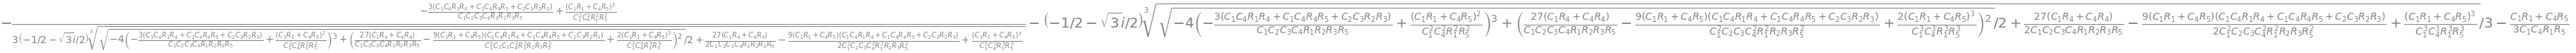

In [69]:
p[1]

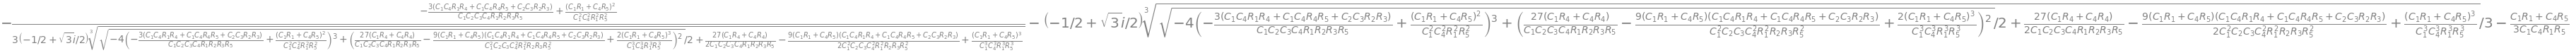

In [70]:
p[2]

### Numerical solution
Ra and Rb are back

In [71]:
net_list = '''
O2 6 4 7 
V1 1 0 1
O1 6 8 5 
C1 3 1 1
C2 5 4 1
C3 7 6 1
C4 0 2 1
R2 5 6 1
R3 7 8 1.0218
R4 8 0 1
R1 4 3 0.5534
R5 2 4 2.425
Rb 2 0 10e6
Ra 3 1 10e6
'''

In [72]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + v_{1} \left(C_{1} s + \frac{1}{Ra}\right) + v_{3} \left(- C_{1} s - \frac{1}{Ra}\right) = 0$<br>$v_{2} \left(C_{4} s + \frac{1}{Rb} + \frac{1}{R_{5}}\right) - \frac{v_{4}}{R_{5}} = 0$<br>$v_{1} \left(- C_{1} s - \frac{1}{Ra}\right) + v_{3} \left(C_{1} s + \frac{1}{Ra} + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$<br>$- C_{2} s v_{5} + v_{4} \left(C_{2} s + \frac{1}{R_{5}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{5}} - \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{4} + I_{O1} + v_{5} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{2}} = 0$<br>$- C_{3} s v_{7} + v_{6} \left(C_{3} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$<br>$- C_{3} s v_{6} + I_{O2} + v_{7} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{8}}{R_{3}} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{7}}{R_{3}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{6} = 0$<br>$v_{6} - v_{8} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [73]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [74]:
element_values = SymMNA.get_part_values(network_df)
element_values

{C₁: 1.0, C₂: 1.0, C₃: 1.0, C₄: 1.0, O₁: nan, O₂: nan, R₁: 0.5534, R₂: 1.0, R₃
: 1.0218, R₄: 1.0, R₅: 2.425, Ra: 10000000.0, Rb: 10000000.0, V₁: 1.0}

In [75]:
NE = NE_sym.subs(element_values)
NE

⎡                  I_V1 + v₁⋅(1.0⋅s + 1.0e-7) + v₃⋅(-s - 1.0e-7)              
⎢                                                                             
⎢              v₂⋅(1.0⋅s + 0.412371234020619) - 0.412371134020619⋅v₄          
⎢                                                                             
⎢      v₁⋅(-s - 1.0e-7) + v₃⋅(1.0⋅s + 1.80701130346946) - 1.80701120346946⋅v₄ 
⎢                                                                             
⎢-s⋅v₅ - 0.412371134020619⋅v₂ - 1.80701120346946⋅v₃ + v₄⋅(1.0⋅s + 2.2193823374
⎢                                                                             
⎢                       I_O1 - s⋅v₄ + v₅⋅(1.0⋅s + 1.0) - v₆                   
⎢                                                                             
⎢                          -s⋅v₇ - v₅ + v₆⋅(1.0⋅s + 1.0)                      
⎢                                                                             
⎢       I_O2 - s⋅v₆ + v₇⋅(1.0⋅s + 0.978665100802505)

In [76]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{3.43081007509371 \cdot 10^{60} s + 3.43081007509371 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$v_{3} = \frac{4.70450000000002 \cdot 10^{60} s^{4} + 1.94000094090001 \cdot 10^{60} s^{3} + 1.02183249216592 \cdot 10^{61} s^{2} + 3.43081211875866 \cdot 10^{60} s + 3.43081109692619 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$v_{4} = \frac{8.31971443210224 \cdot 10^{60} s^{2} + 3.4308117390366 \cdot 10^{60} s + 3.43081090706516 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$v_{5} = \frac{- 8.50108420672212 \cdot 10^{60} s^{3} + 4.81411099715463 \cdot 10^{60} s^{2} + 3.43081138847634 \cdot 10^{60} s + 3.43081090706516 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$v_{6} = \frac{8.31971443210224 \cdot 10^{60} s^{2} + 3.4308117390366 \cdot 10^{60} s + 3.43081090706516 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$v_{7} = \frac{1.68207986388244 \cdot 10^{61} s^{2} + 6.93641517398421 \cdot 10^{60} s + 6.93641349190435 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$v_{8} = \frac{8.31971443210224 \cdot 10^{60} s^{2} + 3.4308117390366 \cdot 10^{60} s + 3.43081090706516 \cdot 10^{53}}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>$I_{V1} = \frac{- 8.50108420672212 \cdot 10^{67} s^{4} - 3.50560343494762 \cdot 10^{67} s^{3} - 3.43081042565398 \cdot 10^{67} s^{2} - 6.86162021491303 \cdot 10^{60} s - 3.43081013981931 \cdot 10^{53}}{4.70450000000002 \cdot 10^{67} s^{4} + 1.04410851476221 \cdot 10^{68} s^{3} + 1.37239275064983 \cdot 10^{68} s^{2} + 6.86162219385238 \cdot 10^{67} s + 6.8616212367455 \cdot 10^{60}}$<br>$I_{O2} = \frac{- 3.40043368268885 \cdot 10^{68} s^{3} - 4.73012714681996 \cdot 10^{68} s^{2} - 1.37232483583875 \cdot 10^{68} s - 1.37232436282607 \cdot 10^{61}}{1.88180000000001 \cdot 10^{68} s^{4} + 4.17643405904885 \cdot 10^{68} s^{3} + 5.48957100259934 \cdot 10^{68} s^{2} + 2.74464887754095 \cdot 10^{68} s + 2.7446484946982 \cdot 10^{61}}$<br>$I_{O1} = \frac{8.50108420672212 \cdot 10^{60} s^{4} + 1.20066876416697 \cdot 10^{61} s^{3} + 3.50560378550787 \cdot 10^{60} s^{2} + 3.50560258483919 \cdot 10^{53} s}{4.70450000000002 \cdot 10^{60} s^{4} + 1.04410851476221 \cdot 10^{61} s^{3} + 1.37239275064983 \cdot 10^{61} s^{2} + 6.86162219385238 \cdot 10^{60} s + 6.8616212367455 \cdot 10^{53}}$<br>

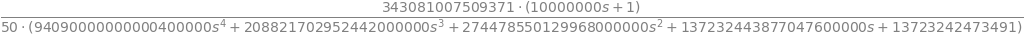

In [77]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [78]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [79]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [80]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

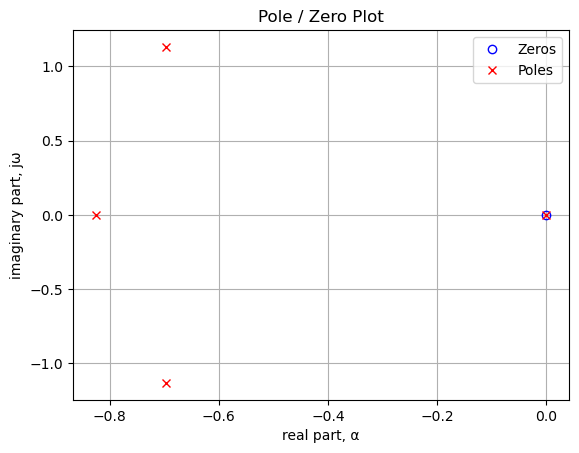

In [81]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [82]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
-0.00 Hz


In [83]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-0.11+0.18j Hz
-0.11-0.18j Hz
-0.13+0.00j Hz
-0.00+0.00j Hz


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

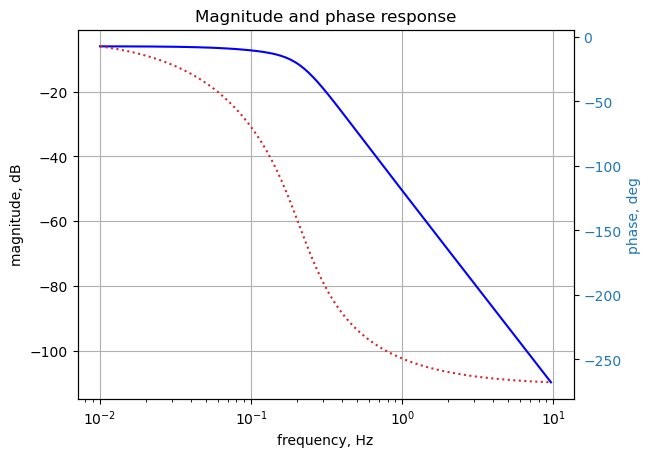

In [84]:
x = np.logspace(-2, 1, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

### Filter impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

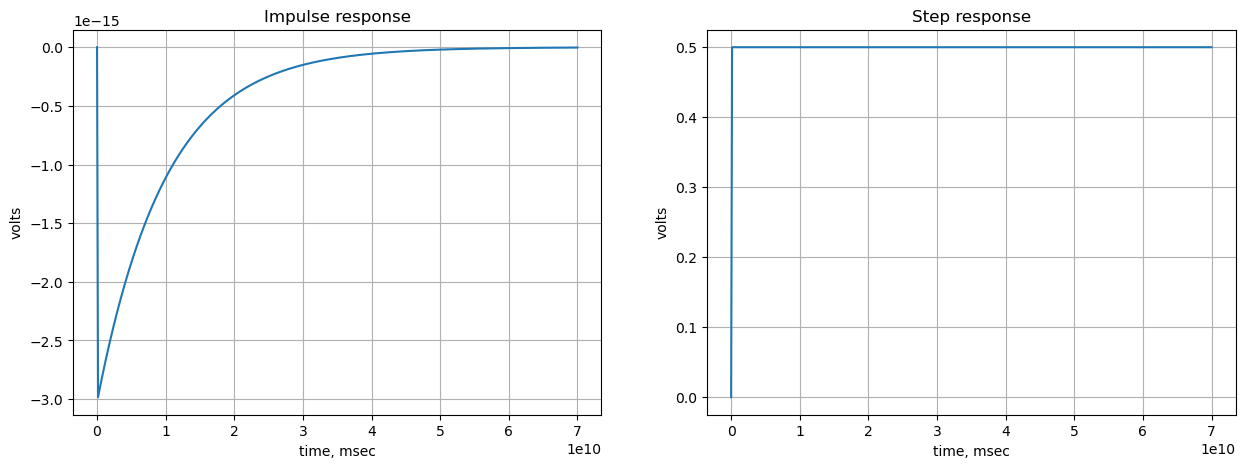

In [85]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Low pass filter group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

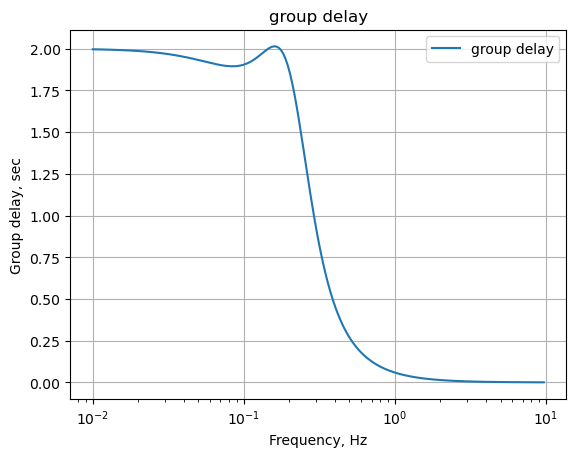

In [86]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

## Dual amplifier band pass filter
![Dual amplifier band pass filter with compoenet values set to 1](DABP.png){#fig-DABP width=400}  

The Dual Amplifier Bandpass (DABP) filter shown above is from @Williams1995, Figure 5-27. The filter was first described by @Sedra1975. The filter uses two Op Amps and has eight branches and 6 nodes. The DABP configuration has been found very useful for designs covering a wide range of Qs and frequencies. Component sensitivity is small, resonant frequency and Q are easily adjustable, and the element spread is low. 

$\large{\color {red} {\text{describe circuit operation}}}$  

describe what each component does in the circuit and the overall operation of the circuit. 

- V1
- U1, U2

The schematic was entered into LTSpice and the netlist was exported as shown below.

The netlist was modified and equated to the net list variable shown below.

In [87]:
net_list = '''
O1 5 4 2
O2 5 6 3
R1 4 1 1
R2 4 3 1
R3 5 2 1
R5 6 2 1
R4 6 0 1
C2 5 3 1
C1 0 4 1
V1 1 0 1
'''

Generate and display the network equations.

In [88]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{4}}{R_{1}} = 0$<br>$I_{O1} + v_{2} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{5}} - \frac{v_{5}}{R_{3}} = 0$<br>$- C_{2} s v_{5} + I_{O2} + v_{3} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{2}} = 0$<br>$v_{4} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$<br>$- C_{2} s v_{3} + v_{5} \left(C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{2}}{R_{3}} = 0$<br>$v_{6} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{2}}{R_{5}} = 0$<br>$v_{1} = V_{1}$<br>$- v_{4} + v_{5} = 0$<br>$v_{5} - v_{6} = 0$<br>

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [89]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Solve the network equations for the unknown node voltages and currents.

In [90]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s + C_{2} R_{2} R_{3} R_{5} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{3} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s - R_{2} R_{5} V_{1}}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{4} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{5} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$v_{6} = \frac{C_{2} R_{2} R_{3} R_{4} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$I_{V1} = \frac{- C_{1} C_{2} R_{2} R_{3} R_{4} V_{1} s^{2} - R_{5} V_{1}}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$I_{O1} = \frac{- C_{2} R_{2} R_{3} V_{1} s - C_{2} R_{2} R_{5} V_{1} s}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>$I_{O2} = \frac{C_{2} R_{2} R_{5} V_{1} s + R_{5} V_{1}}{C_{1} C_{2} R_{1} R_{2} R_{3} R_{4} s^{2} + C_{2} R_{2} R_{3} R_{4} s + R_{1} R_{5}}$<br>

Solving for the transfer function at node 2.

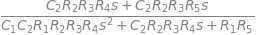

In [91]:
H_sym = U_sym[v2]/U_sym[v1]
H_sym.cancel()

Using the function fraction() extract the numerator and denomiator of the transferfunction.

In [92]:
num, den = fraction(H_sym.cancel())

The denominator is a second order function of the Laplace variable s shown below.

In [93]:
den

The following code extracts the coefficients of s and these are assigned to variables, a, b and c.

In [94]:
p = Poly(den, s)
a, b, c, = p.coeffs()

Omega, $\omega$, is the natural freguency of system and is determined by the following expression: 

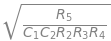

In [95]:
omega = sqrt(c/a)
omega

Q is a parameter that relates the damping ratio to the natural frequency. 

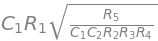

In [96]:
Q = omega/(b/a)
Q

The design of a band pass filter can be accomplished by letting $C1 = C2 = Cn = 0.1\mu$F, $R4 = R5 = Rp = 10$k and $R2 = R3 = R$. We can then solve for R at the desired $\omega$ and $\zeta$. For example, if we desire a band pass filter with a center frequency of 10 Hz, $\omega = 2 \pi 10$ and a damping ratio of $\zeta = 0.5$, we can solve for the value of R that gives an $\omega = 2 \pi 10$ 

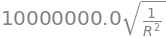

In [97]:
R = Symbol('R')
freq = 10 #Hz
Cn = 0.1e-6
Rp = 10e3
omega_n = omega.subs({R2:R,R3:R,C1:Cn,C2:Cn,R5:Rp,R4:Rp})
omega_n

Solve for R with $\omega = 10$Hz.

In [98]:
Rn = solve(omega_n-freq*2*pi,R)
Rn = float(Rn[1])
Rn

Solve for R with $R2=R3=Rn$,

In [99]:
Q_n = Q.subs({R2:Rn,R3:Rn,C1:Cn,C2:Cn,R5:Rp,R4:Rp})
Q_n

The damping ratio is a system parameter, denoted by $\zeta$

- underdamped: $\zeta \gt 1$, roots of the demoninator are real
- critically damped: $\zeta = 1$
- overdamped: $\zeta \lt 1$, roots of the demoninator are complex 

Q factor is another non-dimensional characterization of the amount of damping; high Q indicates slow damping relative to the oscillation.

$Q = \frac {1}{2 \zeta}$

In [100]:
zeta = 0.5
q_factor = 1/(2*zeta)
R1n = solve(Q_n - q_factor,R1)
R1n = float(R1n[0])
R1n

Using the component values calculated above, these are substituted into the network equations. 

In [101]:
NE = NE_sym.subs({V1:1.0, R1:R1n, R2:Rn, R3:Rn, R5:Rp, R4:Rp, C2:Cn, C1:Cn})

The equations are quickly solved by SymPy and the solution is displayed.

In [102]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{1.25663706143592 \cdot 10^{28} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{3} = \frac{6.28318530717959 \cdot 10^{27} s - 3.94784176043575 \cdot 10^{29}}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{4} = \frac{6.28318530717959 \cdot 10^{27} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{5} = \frac{6.28318530717959 \cdot 10^{27} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$v_{6} = \frac{6.28318530717959 \cdot 10^{27} s}{1.0 \cdot 10^{26} s^{2} + 6.28318530717961 \cdot 10^{27} s + 3.94784176043575 \cdot 10^{29}}$<br>$I_{V1} = \frac{- 6.28318530717959 \cdot 10^{40} s^{2} - 1.25663706143592 \cdot 10^{28} s - 2.48050213442399 \cdot 10^{44}}{1.0 \cdot 10^{46} s^{2} + 6.28318530717961 \cdot 10^{47} s + 3.94784176043575 \cdot 10^{49}}$<br>$I_{O1} = - \frac{6.67796948322322 \cdot 10^{30} s}{1.0 \cdot 10^{33} s^{2} + 6.28318530717961 \cdot 10^{34} s + 3.94784176043575 \cdot 10^{36}}$<br>$I_{O2} = \frac{3.94784176043575 \cdot 10^{42} s + 2.48050213442399 \cdot 10^{44}}{1.0 \cdot 10^{46} s^{2} + 6.28318530717961 \cdot 10^{47} s + 3.94784176043575 \cdot 10^{49}}$<br>

The transfer function is v2/v1 and some simplication is performed by the operations of nsimplify().simplify().expand().together().

In [103]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [104]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [105]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

In [106]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the preamp transfer function are plotted.

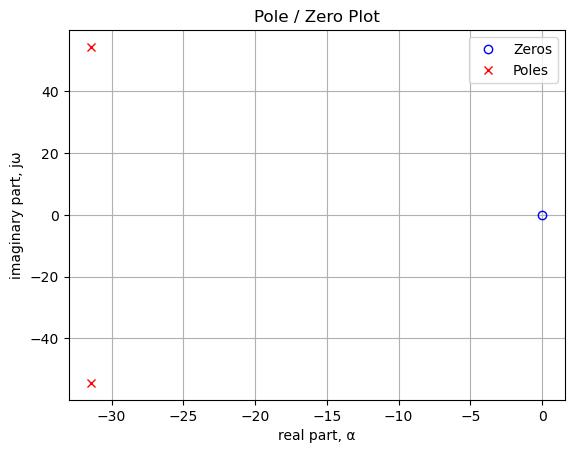

In [107]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values units in Hz.

In [108]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 1
0.00 Hz


In [109]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 2
-5.00+8.66j Hz
-5.00-8.66j Hz


Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

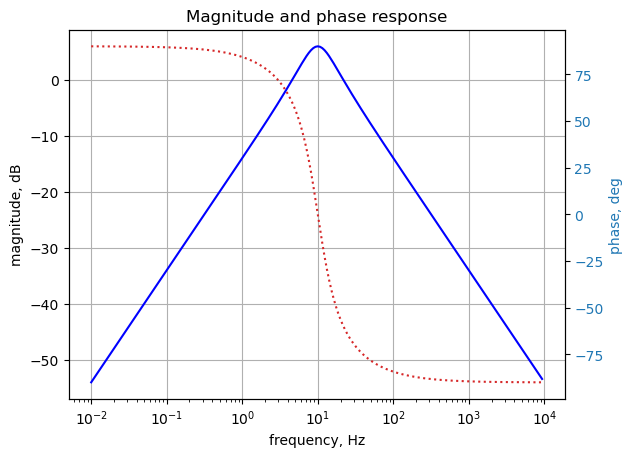

In [110]:
x = np.logspace(-2, 4, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

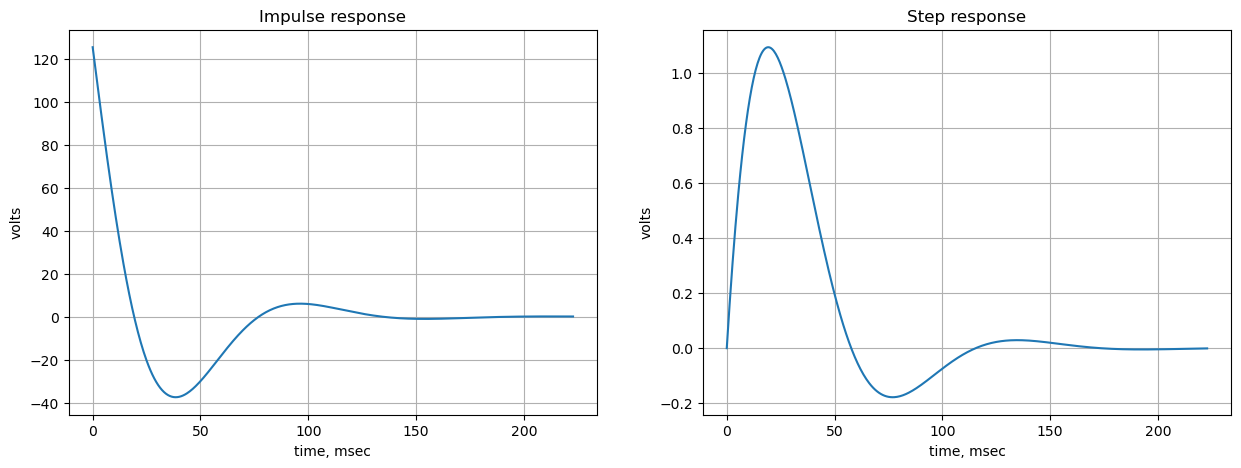

In [111]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

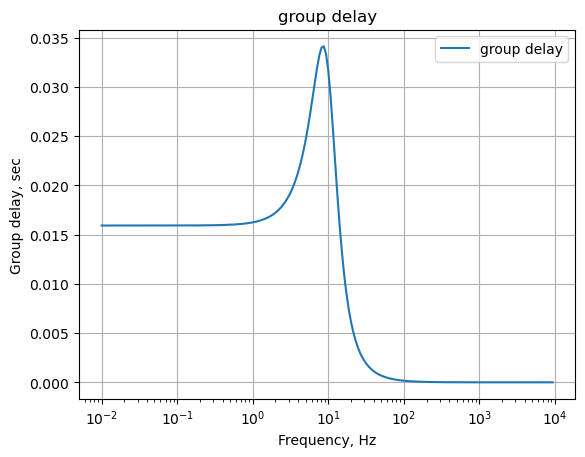

In [112]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

## Summary


$\large{\color {red} {\text{comment}}}$  